In [55]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data_train = pd.read_csv('train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


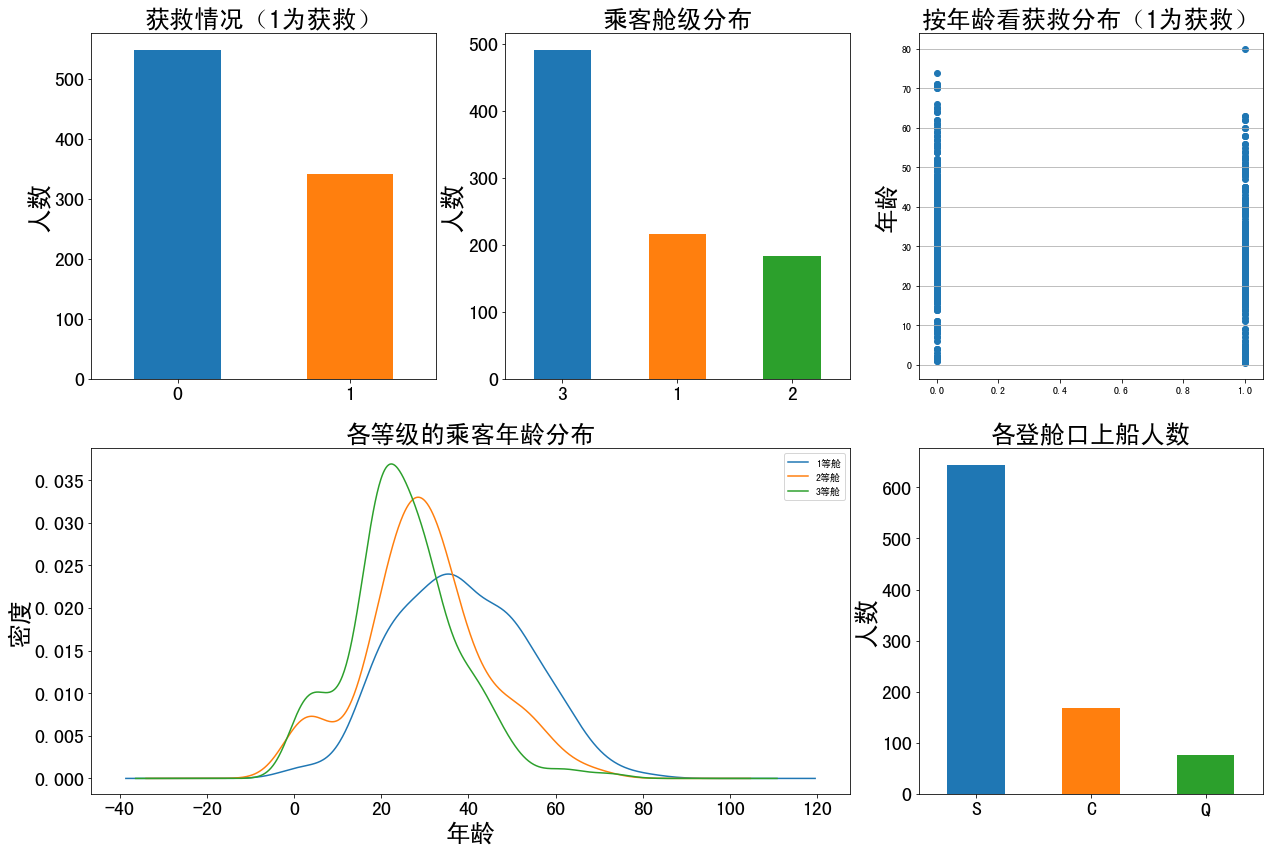

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(21,14))

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar', rot=0, fontsize=20)
plt.title(u"获救情况（1为获救）", fontsize=25)
plt.ylabel(u"人数", fontsize=25)

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar', rot=0, fontsize=20)
plt.title(u"乘客舱级分布", fontsize=25)
plt.ylabel(u"人数", fontsize=25)

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄", fontsize=25)
plt.grid(which='major', axis='y')
plt.title(u"按年龄看获救分布（1为获救）", fontsize=25)

plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde', fontsize=20)
data_train.Age[data_train.Pclass == 2].plot(kind='kde', fontsize=20)
data_train.Age[data_train.Pclass == 3].plot(kind='kde', fontsize=20)
plt.xlabel(u"年龄", fontsize=25)
plt.ylabel(u"密度", fontsize=25)
plt.title(u"各等级的乘客年龄分布", fontsize=25)
plt.legend((u"1等舱", u"2等舱", u"3等舱"), loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar', rot=0, fontsize=20)
plt.title(u"各登舱口上船人数", fontsize=25)
plt.ylabel(u"人数", fontsize=25)

plt.show()

<Figure size 432x288 with 0 Axes>

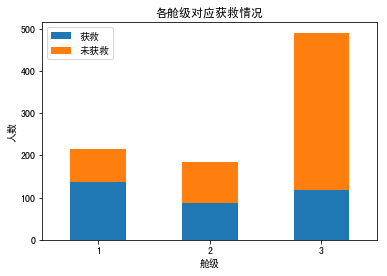

In [29]:
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True, rot=0)
plt.title(u"各舱级对应获救情况")
plt.xlabel(u"舱级")
plt.ylabel(u"人数")
plt.show()

<Figure size 432x288 with 0 Axes>

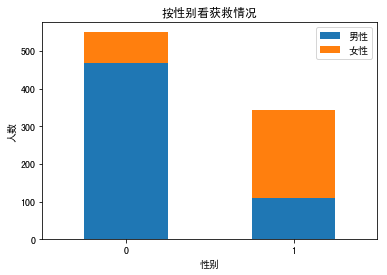

In [30]:
fig = plt.figure()

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True, rot=0)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()

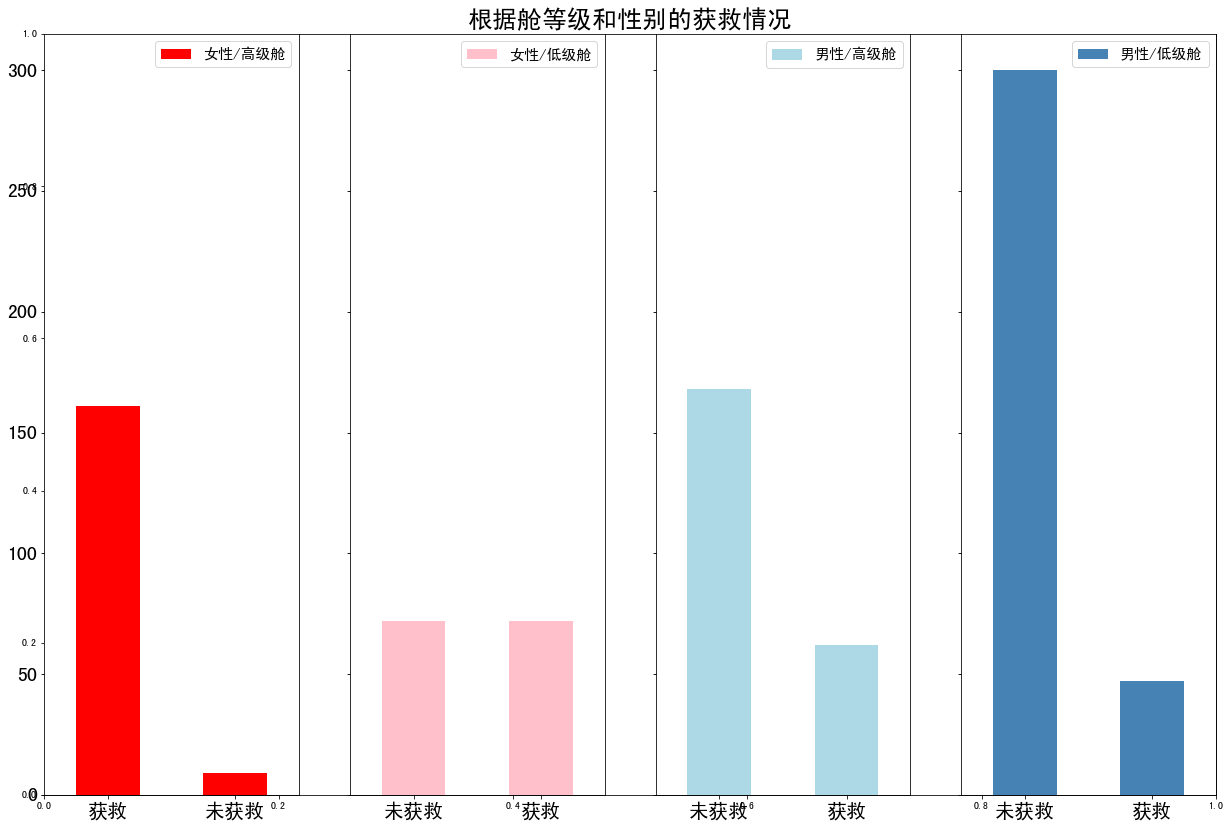

In [39]:
fig=plt.figure(figsize=(21,14))
plt.title(u"根据舱等级和性别的获救情况", fontsize=25)

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='red', fontsize=20)
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best', fontsize=15)

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink', fontsize=20)
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best', fontsize=15)

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue', fontsize=20)
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best', fontsize=15)

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue', fontsize=20)
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best', fontsize=15)

plt.show()

<Figure size 432x288 with 0 Axes>

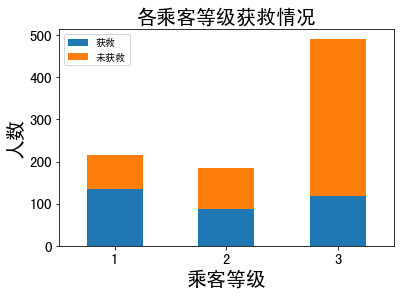

In [42]:
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u"获救":Survived_1, u"未获救":Survived_0})
df.plot(kind='bar', stacked=True, rot=0, fontsize=15)
plt.title(u"各乘客等级获救情况", fontsize=20)
plt.xlabel(u"乘客等级", fontsize=20)
plt.ylabel(u"人数", fontsize=20)

plt.show()

<Figure size 432x288 with 0 Axes>

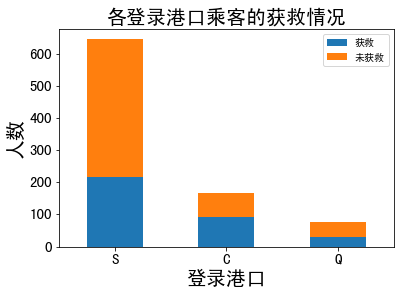

In [43]:
fig = plt.figure()

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u"获救":Survived_1, u"未获救":Survived_0})
df.plot(kind='bar', stacked=True, rot=0, fontsize=15)
plt.title(u"各登录港口乘客的获救情况", fontsize=20)
plt.xlabel(u"登录港口", fontsize=20)
plt.ylabel(u"人数", fontsize=20)

plt.show()

In [44]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [45]:
data_train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
F2                 3
D                  3
F33                3
C22 C26            3
E101               3
D17                2
C123               2
C125               2
E33                2
C78                2
F G73              2
C124               2
B35                2
B18                2
B57 B59 B63 B66    2
C126               2
D26                2
E8                 2
B28                2
B58 B60            2
E44                2
C68                2
C52                2
B77                2
D20                2
C2                 2
C83                2
                  ..
B71                1
D10 D12            1
B41                1
A5                 1
D56                1
D15                1
E50                1
C118               1
C32                1
C7                 1
D11                1
B37                1
C45                1
C111               1
A36                1
D7                 1
D47          

<Figure size 432x288 with 0 Axes>

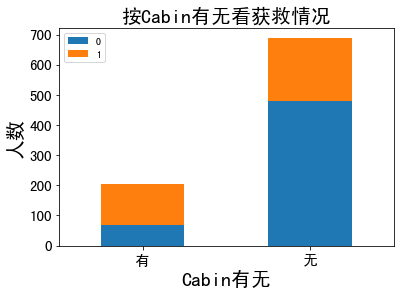

In [47]:
fig = plt.figure()

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({u"有":Survived_cabin, u"无":Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True, rot=0, fontsize=15)
plt.title(u"按Cabin有无看获救情况", fontsize=20)
plt.xlabel(u"Cabin有无", fontsize=20)
plt.ylabel(u"人数", fontsize=20)

plt.show()

In [92]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data_train = pd.read_csv('train.csv')

In [93]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1:])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [94]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [99]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1))
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [101]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

y = train_np[:,0]
X = train_np[:,1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=1e-06, verbose=0, warm_start=False)

In [102]:
X.shape

(891, 14)

In [116]:
data_test = pd.read_csv('test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [117]:
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
tmp_df = data_test[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()), 'Age'] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Sex', 'Name', 'Embarked', 'Cabin', 'Ticket'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1, 1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1, 1))
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [119]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)